<a href="https://colab.research.google.com/github/YahtzeeRage/cs480student/blob/main/04/Copy_of_CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

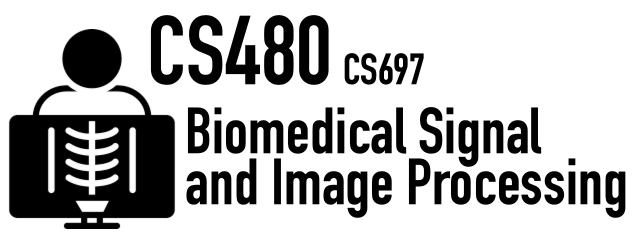
#Assignment 4

In [1]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7MB 1.2MB/s 


In [4]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier


**Task 1:** Download, extract, and load the data! [15 Points]

In [5]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.


# AUTO DOWNLOAD WITH CURL
!curl https://cs480.org/data/xray.zip --output xray.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 61.4M  100 61.4M    0     0   121M      0 --:--:-- --:--:-- --:--:--  120M


In [6]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [7]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [8]:
# TODO: Please display this image and print the dimensions!

In [9]:
# TODO: YOUR CODE

(1858, 2090)


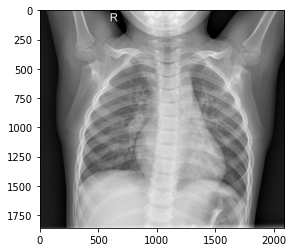

In [10]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
print(img.shape)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [11]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [12]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [13]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) Load all images from a directory of images from a healthy patient and resize them to 300x300 and 
                   # put them into a 3d volume as a stack of images
# TODO: Operation 2) Load all images from a directory of images from a patient with pneumonia and resize them to 300x300 and
                   # load them into a 3d volume as a stack of images

In [14]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

Normal Images:


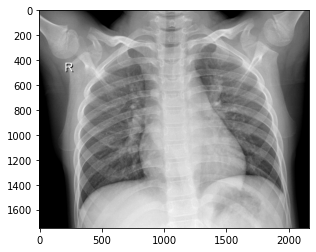

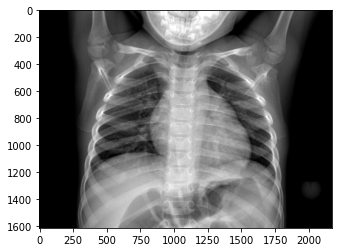

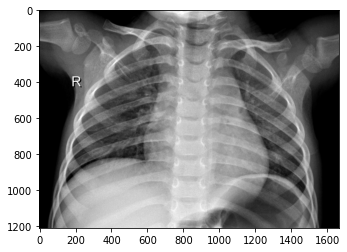

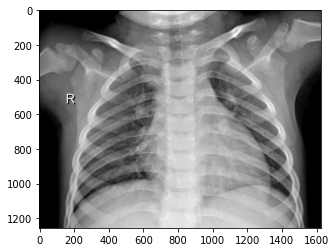

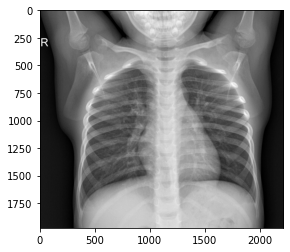

Pneumonia Images:


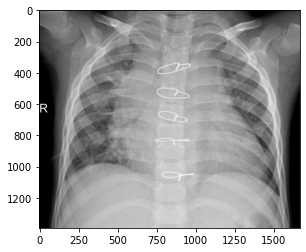

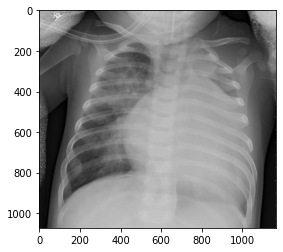

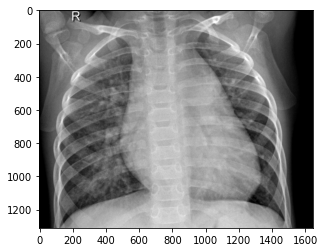

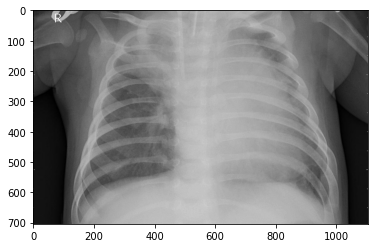

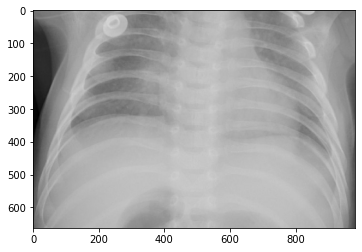

In [33]:
# TODO: YOUR CODE
import matplotlib.image as mpimg
def processImage(filename):
  image = mpimg.imread(filename)
  plt.figure()
  plt.imshow(image, cmap='gray', vmin=0, vmax=255)

print("Normal Images:")
for imgname in normal_files[0:5]:
  processImage(NORMAL_DIR+imgname)
plt.show()
print("Pneumonia Images:")
for imgname in pneumonia_files[0:5]:
  processImage(PNEUMONIA_DIR+imgname)

plt.show()

**Task 3:** Setup training and testing data. [15 Points]

In [16]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [17]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [18]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = np.concatenate( (np.zeros(TRAINING_COUNT), np.ones(TRAINING_COUNT)) )

In [19]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [20]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = np.concatenate( (np.zeros(TESTING_COUNT), np.ones(TESTING_COUNT)) )

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [21]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [22]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [23]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [24]:
# TODO: 
# As a black box, the random forest classifier is meant to take in a list of feature vectors and
# list of labels (in this case 0 or 1) and learn how to correctly identify the label based off of
# the feature vectors corresponding to it. Internally the random forest classifier works by using
# the training data to create an ensemble of decision trees that vote based off of the feature
# vector values what the categorical output should be.

In [25]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.8625

In [26]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [27]:
# The accuracy is pretty good. It is pretty surprising that it works so decently out the sklearn box with no fine-tuning of hyperparameters

**Bonus:** Let's take a closer look! [33 Points]

In [28]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

Indices: [1, 6, 9, 10, 16, 19, 33, 37, 46, 58, 62]
normal:


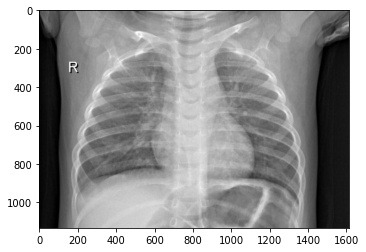

normal:


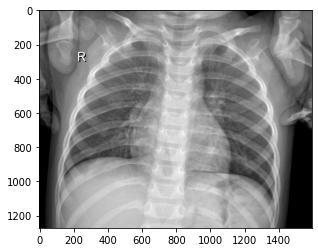

normal:


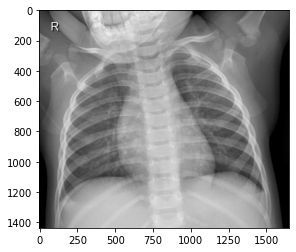

normal:


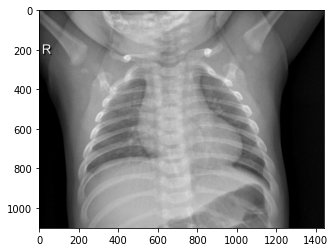

normal:


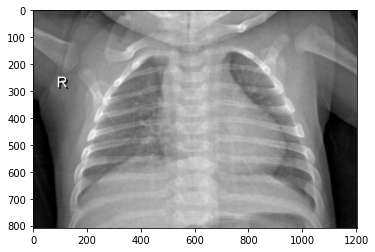

normal:


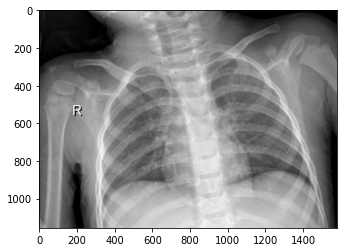

normal:


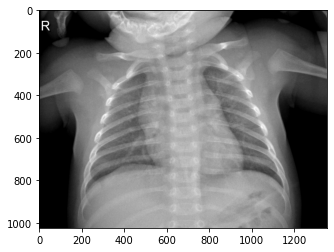

normal:


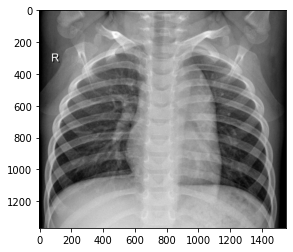

pneum


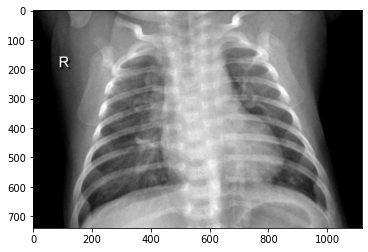

pneum


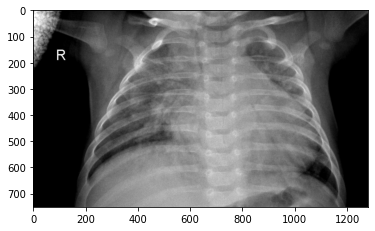

pneum


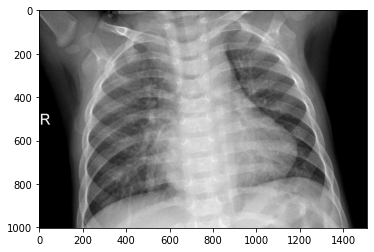

In [41]:
# TODO: 
predictions = clf.predict(testing_data)

incorrect_predictions_indices = [i for i, x in enumerate(predictions!=testing_target) if x]
print("Indices:", incorrect_predictions_indices )

for index in incorrect_predictions_indices:
  if (testing_target[index] == 0):
    print("normal:")
    image_index = index
    
    imgpath = normal_files[TRAINING_COUNT+image_index]
    processImage(NORMAL_DIR+imgpath)
    plt.show()
  else:
    print("pneum")
    image_index = index - TESTING_COUNT
    imgpath = pneumonia_files[TRAINING_COUNT+image_index]
    processImage(PNEUMONIA_DIR+imgpath)
    plt.show()


In [ ]:
# When I look at the images that made mistakes (after looking at first 5 images of both sets above), I notice two things that could be problems:
  # the images that were misclassified tend to be images that have some significant horizontal skew to them where the image is not well aligned 
  # vertically and the person seems rotated a bit. Also the images are not very distinct as we would expect from images that give the classifier
  # trouble. The normal images seem a bit cloudy (smoking residue maybe?) and the pneumonia images don't seem very cloudy at all (maybe well
  # into the recovery process).

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

# More data examples
# use a more complicated classifier like a neural network
# align the images that are aligned improperly with the other properly vertical images
# remove the parts of the image that are irrelevant to the diagnosis; basically everything but the lungs

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw